In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import json
from datasets import load_dataset


dataset = load_dataset("gsm8k", "main")
train_questions = np.array(dataset["train"]["question"])
train_answers = np.array(dataset["train"]['answer'])

test_questions = np.array(dataset["test"]["question"])
test_answers = np.array(dataset["test"]['answer'])

In [7]:
len(train_questions)

7473

In [75]:
import json


with open('ckpts/amrith_gsm8k/gsm8k_batch_1_outputs_gpt4.jsonl', 'r') as json_file:
    json_list = list(json_file)

train_questions_amrith = []
train_answers_amrith = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions_amrith.append(result["query"])
    train_answers_amrith.append(result["response"].replace("SOLUTION:\n", "").replace("\n\n", "\n"))

train_questions_amrith = np.array(train_questions_amrith)
train_answers_amrith = np.array(train_answers_amrith)

In [77]:
train_answers_amrith

['James baked 35 * 2 = <<35*2=70>>70 cookies in November. Therefore, adding the cookies from October and November, James baked 35 + 70 = <<35+70=105>>105 cookies altogether. #### 105',
 "First, convert the tutoring time into hours. Maria tutored for 1 hour and 30 minutes, which is 1.5 hours (since 30 minutes is half of an hour).\nNext, calculate Maria's earnings by multiplying the time she worked by her hourly rate. She charges $15 per hour, so:\n15 x 1.5 = $22.5\nThus, Maria earned $22.5 for her tutoring session last Saturday. #### 22.5",
 "First, calculate how much money John currently has, which is one-third of $60:\nJohn's current savings = 60/3 = 20 dollars.\nNext, let's determine the amount his aunt gives, which is three times what his uncle provides:\nAunt's contribution = 3 * 10 = 30 dollars.\nNow, add the uncle's contribution to the amount:\nTotal contribution from relatives = 10 + 30 = 40 dollars.\nAdd John's current savings to the contribution from his relatives to find out 

In [33]:
amrith_data_orig_idxs = np.tile(np.arange(len(train_questions)), 6)

In [40]:
orig_data_unmemorized_acc = np.load("gsm8k_unmemorized_acc_cummax_all.npy")

In [73]:
orig_data_subsample_idxs = np.where(orig_data_unmemorized_acc<=0.125)[0]

In [79]:
for answer in train_answers[orig_data_subsample_idxs]:
    print(answer)

Let S be the amount Alexis paid for the shoes.
She spent S + 30 + 46 + 38 + 11 + 18 = S + <<+30+46+38+11+18=143>>143.
She used all but $16 of her budget, so S + 143 = 200 - 16 = 184.
Thus, Alexis paid S = 184 - 143 = $<<184-143=41>>41 for the shoes.
#### 41
She works 8 hours a day for $18 per hour so she makes 8*18 = $<<8*18=144.00>>144.00 per 8-hour shift
She works 10 hours a day and anything over 8 hours is eligible for overtime, so she gets 10-8 = <<10-8=2>>2 hours of overtime
Overtime is calculated as time and a half so and she makes $18/hour so her overtime pay is 18*.5 = $<<18*.5=9.00>>9.00
Her overtime pay is 18+9 = $<<18+9=27.00>>27.00
Her base pay is $144.00 per 8-hour shift and she works 5 days and makes 5 * $144 = $<<144*5=720.00>>720.00
Her overtime pay is $27.00 per hour and she works 2 hours of overtime per day and makes 27*2 = $<<27*2=54.00>>54.00 in overtime pay
2 hours of overtime pay for 5 days means she makes 54*5 = $270.00
In 5 days her base pay is $720.00 and she m

In [74]:
len(orig_data_subsample_idxs)/len(orig_data_unmemorized_acc)

0.17703733440385389

In [58]:
amrith_data_subsample_idxs = np.where([elem in orig_data_subsample_idxs for elem in amrith_data_orig_idxs])[0]

In [59]:
len(amrith_data_subsample_idxs)

14448

In [56]:
len(train_questions)

7473

In [4]:
import numpy as np
import matplotlib.pyplot as plt

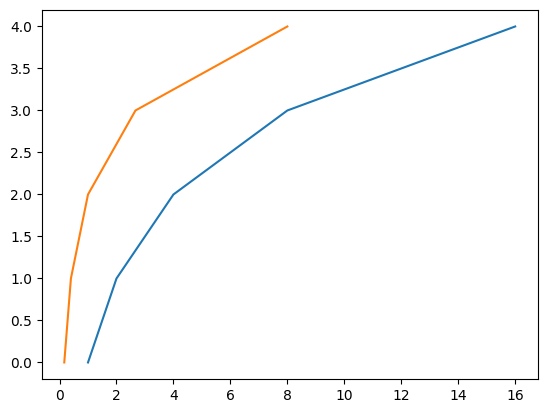

In [11]:
a = np.array([1, 2, 4, 8, 16])

b = np.log2(a)

plt.plot(a, b)
plt.plot(a*c, b)

In [10]:
c = np.array([1/6, 1/5, 1/4, 1/3, 1/2])

In [44]:
len(np.where(orig_data_unmemorized_acc>0.75)[0])

1305

In [ ]:
sorted_idxs = np.argsort(unmemorized_acc_cummax_all) #lowest to highest
subsample_idxs = sorted_idxs[:len(sorted_idxs)//4]

In [19]:
for i in range(6):
    # print(result_list[i*7473+5]["query"])
    print(result_list[i*7473+5]["response"].replace("SOLUTION:\n", "").replace("\n\n", "\n"))
    print("")

First, calculate the number of black stones Lisa has:
The number of black stones is 50% more than the white stones. Since Lisa has 15 white stones,
Number of black stones = 15 + (50% of 15) 
                   = 15 + (0.50 * 15) 
                   = 15 + 7.5 
                   = 22.5 
Lisa has 22.5 black stones.
Next, we calculate the total number of white and black stones:
Total number of white and black stones = 15 white stones + 22.5 black stones 
                                     = 37.5 
Now, calculate the number of red stones, which is 30% of the number of white and black stones combined:
Number of red stones = 30% of 37.5 
                    = 0.30 * 37.5 
                    = 11.25 
Lisa has 11.25 red stones.
Finally, calculate the total number of stones:
Total number of stones = Number of white stones + Number of black stones + Number of red stones 
                      = 15 + 22.5 + 11.25 
                      = 48.75 
Thus, Lisa has 48.75 stones in total in her garde

In [22]:
j = 0
for i in range(len(result_list)):
    if "#### " not in result_list[i]["response"]:
        print(i, result_list[i]["response"])
        j+=1

30 SOLUTION:
Each cake is divided into 6 slices. Therefore, John's cake has 6 slices, and he ate 4 slices. So, he has 6-4 = <<6-4=2>>2 slices remaining. Similarly, Emma has 6-4 = <<6-4=2>>2 slices remaining. Sarah has 6-2 = <<6-2=4>>4 slices remaining, and Mike also has 6-2 = <<6-2=4>>4 slices remaining. Adding all the remaining slices together, we get 2+2+4+4 = <<2+2+4+4=12>>12 slices remaining uneaten altogether.

12
46 Michael reads for 15 minutes daily and studies science for twice as long each day. This means he studies science for 15 * 2 = 30 minutes each day. He studies five days a week, so the total minutes he spends studying science in one week is calculated as follows:

30 minutes per day * 5 days = 150 minutes.

150
62 SOLUTION:
First, calculate the total volume of water in the 15 containers that each hold 10 gallons:
15 containers * 10 gallons/container = 150 gallons

Next, subtract this amount from the total gallons of water to find the amount in the remaining containers:


In [24]:
print(j/len(result_list))

0.03947544493509969


In [ ]:
result_list[0]

In [8]:
len(result_list)/7473

6.0

In [84]:

train_types = ["add_rand_quarter", "add_hard_quarter", "add_easy_quarter", "add_medium_quarter", "add_easymedium_quarter", "add_hardmedium_quarter"]
for train_type in train_types:
    run_name = f"gsm8k_gpt4o_3epochs_{train_type}_lr5e-05_bs128"
    acc = (np.load(f"ckpts/{run_name}/checkpoint-219/test_answer_types5_seed2_temp0.8.npy")==0).mean()
    print(train_type, acc)

add_rand_quarter 0.5203942380591358
add_hard_quarter 0.5270659590598938
add_easy_quarter 0.4856709628506444
add_medium_quarter 0.5190295678544352
add_easymedium_quarter 0.5014404852160728
add_hardmedium_quarter 0.5149355572403336


In [86]:

train_types = ["add_memorized_half", "add_unmemorized_half"]
for train_type in train_types:
    run_name = f"gsm8k_gpt4o_3epochs_{train_type}_lr5e-05_bs128"
    acc = (np.load(f"ckpts/{run_name}/checkpoint-261/test_answer_types5_seed2_temp0.8.npy")==0).mean()
    print(train_type, acc)

add_memorized_half 0.531918119787718
add_unmemorized_half 0.5153904473085671


In [8]:
def get_stats(train_name):
    num_memorized_all = []
    num_correct_different_all = []
    num_incorrect_all = []
    perplexities_all = []

    ckpts = sorted([
    f for f in os.listdir("ckpts/"+train_name) if os.path.isdir(os.path.join("ckpts/"+train_name, f))
    ], key=lambda x: int(x.split('-')[1]))
    print(ckpts)

    for ckpt in ckpts:
        try:
            train_correct = (np.load("ckpts/"+train_name+"/"+ckpt+ "/train_answer_types5_seed2.npy")==0)
            train_samples = (np.load("ckpts/"+train_name+"/"+ckpt+ "/train_answers5_seed2.npy"))
        except:
            train_correct = (np.load("ckpts/"+train_name+"/"+ckpt+ "/train_answer_types5_seed2_temp0.8.npy")==0)
            train_samples = (np.load("ckpts/"+train_name+"/"+ckpt+ "/train_answers5_seed2_temp0.8.npy"))
            

        subsample_idxs = np.arange(len(train_answers))

        num_memorized_ckpt = []
        num_correct_different_ckpt = []
        num_incorrect_ckpt = []

        for input_idx in range(len(subsample_idxs)):
            num_memorized = 0
            num_correct_different = 0
            num_incorrect = 0
            for sample_idx in range(5):
                correct = train_correct[input_idx, sample_idx]
                if correct:
                    if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                        num_memorized+=1
                    else:
                        num_correct_different+=1
                else:
                    num_incorrect+=1 
            num_memorized_ckpt.append(num_memorized)
            num_correct_different_ckpt.append(num_correct_different)
            num_incorrect_ckpt.append(num_incorrect)
        
        num_memorized_all.append(num_memorized_ckpt)
        num_correct_different_all.append(num_correct_different_ckpt)
        num_incorrect_all.append(num_incorrect_ckpt)
        
        
        perplexities = np.load("ckpts/"+train_name+"/"+ckpt+ "/train_perplexities.npy")[subsample_idxs]
        perplexities_all.append(perplexities)
        
    num_memorized_all = np.array(num_memorized_all)
    num_correct_different_all = np.array(num_correct_different_all)
    num_incorrect_all = np.array(num_incorrect_all)
    perplexities_all = np.array(perplexities_all)
    
    test_accs_all = []
    test_samples_all = []

    for ckpt in ckpts:
        try:
            test_accs = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answer_types50_seed2.npy")==0)
            test_samples = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answers50_seed2.npy"))
        except:
            try:
                test_accs = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answer_types50_seed2_temp0.8.npy")==0)
                test_samples = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answers50_seed2_temp0.8.npy"))
            except:
                test_accs = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answer_types5_seed2_temp0.8.npy")==0)
                test_samples = (np.load("ckpts/"+train_name+"/"+ckpt+ "/test_answers5_seed2_temp0.8.npy"))
        
        
        test_accs_all.append(test_accs)
        test_samples_all.append(test_samples)

    test_accs_all = np.array(test_accs_all)
    test_samples_all = np.array(test_samples_all)
    
    return_dict = {}
    return_dict["num_memorized_all"] = num_memorized_all
    return_dict["num_correct_different_all"] = num_correct_different_all
    return_dict["num_incorrect_all"] = num_incorrect_all
    return_dict["perplexities_all"] = perplexities_all
    return_dict["test_accs_all"] = test_accs_all
    return_dict["test_samples_all"] = test_samples_all
    
    return return_dict


def get_ratios2(stats_dict, perp_threshold=-2.5):
    num_incorrect_all = stats_dict["num_incorrect_all"]
    num_memorized_all = stats_dict["num_memorized_all"]
    num_correct_different_all = stats_dict["num_correct_different_all"]
    perplexities_all = stats_dict["perplexities_all"]
    test_accs_all = stats_dict["test_accs_all"]
    test_samples_all = stats_dict["test_samples_all"]
    
    
    memorization_mask = np.ones(num_incorrect_all.shape)*-1
    accs_all = np.ones(num_incorrect_all.shape)*-1
    

    
    for i in range(len(num_memorized_all)):
        
        accs_all[i] = (num_memorized_all[i]+num_correct_different_all[i])/5

        memorization_mask[i] = (np.log(np.log((perplexities_all[i]))) >= perp_threshold)

    
    
    unmemorized_acc_cummax = np.array([(accs_all*memorization_mask)[:j+1].max(axis=0) for j in range(len(num_memorized_all))])
    
    print(unmemorized_acc_cummax.shape)
    print(accs_all.shape)
    unmemorized_acc_cummax = (np.min([unmemorized_acc_cummax, accs_all], axis=0))
    unmemorized_acc_cummax_mean = unmemorized_acc_cummax.mean(axis=1)
    

    avg_test_acc = test_accs_all.mean(axis=1).mean(axis=1)
        
    
    return_dict = {}
    
    
    return_dict["unmemorized_acc_cummax"] = unmemorized_acc_cummax_mean
    return_dict["unmemorized_acc_cummax_all"] = unmemorized_acc_cummax

    return_dict["avg_test_acc"] = avg_test_acc
            
    return return_dict

In [73]:
# train_types = ["add_rand_quarter", "add_hard_quarter", "add_easy_quarter", "add_medium_quarter", "add_easymedium_quarter", "add_hardmedium_quarter"]

train_type = "add_hard_quarter"
run_name = f"gsm8k_gpt4o_3epochs_{train_type}_lr5e-05_bs128"
stats_dict_hard = get_stats(run_name)
ratios_dict_hard = get_ratios2(stats_dict_hard)


['checkpoint-73', 'checkpoint-146', 'checkpoint-219']
(3, 7473)
(3, 7473)


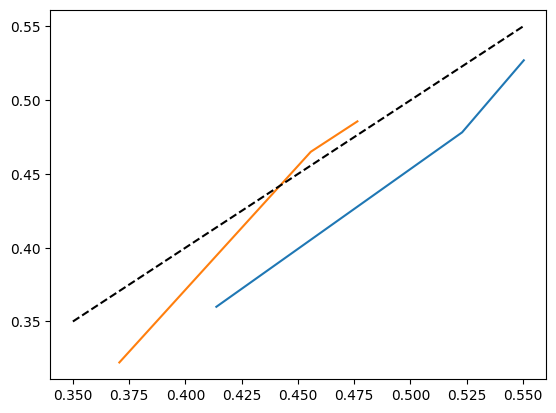

In [82]:
plt.plot(ratios_dict_hard["unmemorized_acc_cummax"], ratios_dict_hard["avg_test_acc"])
plt.plot(ratios_dict_easy["unmemorized_acc_cummax"], ratios_dict_easy["avg_test_acc"])
plt.plot([0.35, 0.55], [0.35, 0.55], "--", c =  "black")

In [74]:
ratios_dict_hard["unmemorized_acc_cummax"]

array([0.41375619, 0.52297605, 0.55038137])

In [75]:
ratios_dict_hard["avg_test_acc"]

array([0.35996967, 0.47824109, 0.52706596])

In [77]:
ratios_dict_easy["unmemorized_acc_cummax"]

array([0.37064097, 0.45572059, 0.47643517])

In [78]:
ratios_dict_easy["avg_test_acc"]

array([0.3222138 , 0.46504928, 0.48567096])

In [76]:
# train_types = ["add_rand_quarter", "add_hard_quarter", "add_easy_quarter", "add_medium_quarter", "add_easymedium_quarter", "add_hardmedium_quarter"]

train_type = "add_easy_quarter"
run_name = f"gsm8k_gpt4o_3epochs_{train_type}_lr5e-05_bs128"
stats_dict_easy = get_stats(run_name)
ratios_dict_easy = get_ratios2(stats_dict_easy, perp_threshold=-2.3)


['checkpoint-73', 'checkpoint-146', 'checkpoint-219']
(3, 7473)
(3, 7473)


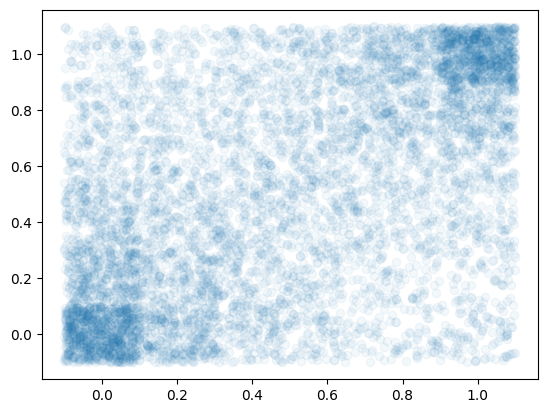

In [61]:
plt.scatter(ratios_dict_easy["unmemorized_acc_cummax_all"][-1]+np.random.uniform(-0.1, 0.1, 7473)
            , ratios_dict_hard["unmemorized_acc_cummax_all"][-1]+np.random.uniform(-0.1, 0.1, 7473), alpha=0.05)


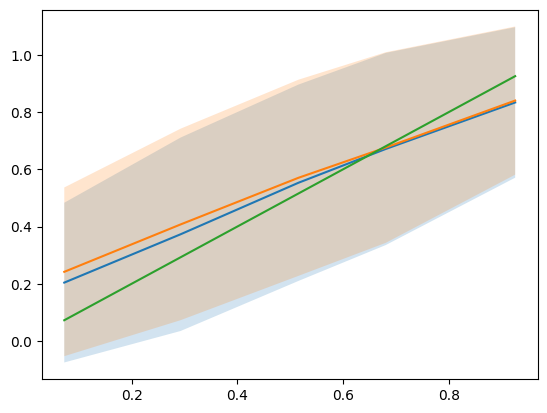

In [68]:
means = []
stds = []
x_means = []
for orig_acc_cummax in [0, 0.2, 0.4, 0.6, 0.8]:
    idxs = np.where((acc_cummaxs_orig>=orig_acc_cummax) * (acc_cummaxs_orig<=orig_acc_cummax+0.2))[0]
    acc_cummaxs = ratios_dict_easy["unmemorized_acc_cummax_all"][-1][idxs]
    x_means.append(acc_cummaxs_orig[idxs].mean())

    means.append(acc_cummaxs.mean())
    stds.append(np.std(acc_cummaxs))
    
    # plt.hist(ratios_dict["unmemorized_acc_cummax_all"][-1][idxs], alpha=0.2, bins = np.arange(0, 1.2, 0.2)-0.1)

means = np.array(means)
stds = np.array(stds)
plt.plot(x_means, means)
plt.fill_between(x_means, means-stds , means+stds, alpha=0.2)


means = []
stds = []
x_means = []
for orig_acc_cummax in [0, 0.2, 0.4, 0.6, 0.8]:
    idxs = np.where((acc_cummaxs_orig>=orig_acc_cummax) * (acc_cummaxs_orig<=orig_acc_cummax+0.2))[0]
    acc_cummaxs = ratios_dict_hard["unmemorized_acc_cummax_all"][-1][idxs]
    x_means.append(acc_cummaxs_orig[idxs].mean())
    
    means.append(acc_cummaxs.mean())
    stds.append(np.std(acc_cummaxs))
    
    # plt.hist(ratios_dict["unmemorized_acc_cummax_all"][-1][idxs], alpha=0.2, bins = np.arange(0, 1.2, 0.2)-0.1)

means = np.array(means)
stds = np.array(stds)
plt.plot(x_means, means)
plt.fill_between(x_means, means-stds , means+stds, alpha=0.2)

plt.plot(x_means, x_means)


In [33]:
train_type = "full"
run_name = f"gsm8k_orig_3epochs_{train_type}_lr5e-05_bs128"
stats_dict_orig = get_stats(run_name)
ratios_dict_orig = get_ratios2(stats_dict_orig, perp_threshold=-2.3)

['checkpoint-58', 'checkpoint-116', 'checkpoint-174']
(3, 7473)
(3, 7473)


In [34]:
len(ratios_dict_orig["unmemorized_acc_cummax_all"][0])

7473

In [40]:
acc_cummaxs_orig= np.load("gsm8k_unmemorized_acc_cummax_all.npy")

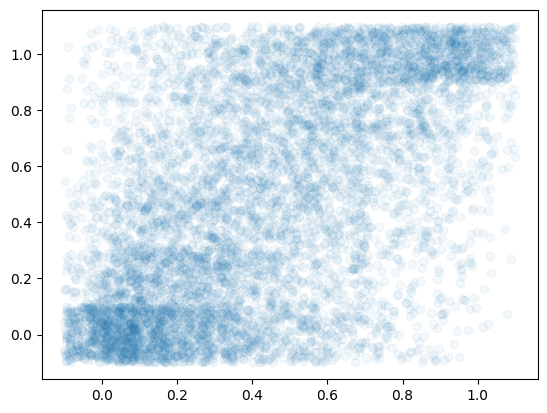

In [56]:
plt.scatter(acc_cummaxs_orig+np.random.uniform(-0.1, 0.1, 7473)
            , ratios_dict["unmemorized_acc_cummax_all"][-1]+np.random.uniform(-0.1, 0.1, 7473), alpha=0.05)


# means = []
# stds = []
# for orig_acc_cummax in [0, 0.2, 0.4, 0.6, 0.8]:
#     idxs = np.where((acc_cummaxs_orig>=orig_acc_cummax) * (acc_cummaxs_orig<=orig_acc_cummax+0.2))[0]
#     acc_cummaxs = ratios_dict["unmemorized_acc_cummax_all"][-1][idxs] - acc_cummaxs_orig[idxs]
    
#     means.append(acc_cummaxs.mean())
#     stds.append(np.std(acc_cummaxs))
    
#     # plt.hist(ratios_dict["unmemorized_acc_cummax_all"][-1][idxs], alpha=0.2, bins = np.arange(0, 1.2, 0.2)-0.1)
    
# plt.plot([0, 0.2, 0.4, 0.6, 0.8], means)
# plt.plot([0, 1], [0, 0])

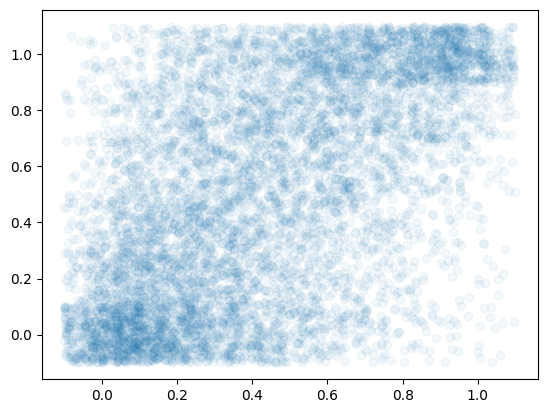

In [58]:
plt.scatter(acc_cummaxs_orig+np.random.uniform(-0.1, 0.1, 7473)
            , ratios_dict["unmemorized_acc_cummax_all"][-1]+np.random.uniform(-0.1, 0.1, 7473), alpha=0.05)


# means = []
# stds = []
# for orig_acc_cummax in [0, 0.2, 0.4, 0.6, 0.8]:
#     idxs = np.where((acc_cummaxs_orig>=orig_acc_cummax) * (acc_cummaxs_orig<=orig_acc_cummax+0.2))[0]
#     acc_cummaxs = ratios_dict["unmemorized_acc_cummax_all"][-1][idxs] - acc_cummaxs_orig[idxs]
    
#     means.append(acc_cummaxs.mean())
#     stds.append(np.std(acc_cummaxs))
    
#     # plt.hist(ratios_dict["unmemorized_acc_cummax_all"][-1][idxs], alpha=0.2, bins = np.arange(0, 1.2, 0.2)-0.1)
    
# plt.plot([0, 0.2, 0.4, 0.6, 0.8], means)
# plt.plot([0, 1], [0, 0])

In [48]:
means

[0.1584795321637427, nan, nan, 0.037681159420289885, nan, -0.11459459459459459]

In [26]:
ratios_dict_orig["unmemorized_acc_cummax_all"]

array([[0.4, 0.4, 0. , ..., 0.2, 0. , 0. ],
       [0.4, 0.4, 0.6, ..., 0.2, 0.4, 0. ],
       [0.4, 0.4, 0.2, ..., 0. , 0.4, 0. ]])

In [25]:
means

[0.4378423175024619,
 0.4401426499124118,
 0.44174174588778337,
 0.44482725795035233,
 0.4454217526100264,
 0.4504286668393163]

In [10]:
ratios_dict

{'unmemorized_acc_cummax': array([0.38214907, 0.4598421 , 0.48323297]),
 'unmemorized_acc_cummax_all': array([[1. , 0.2, 0.6, ..., 0.4, 0.2, 0. ],
        [1. , 0.2, 0.6, ..., 0.2, 0.6, 0.2],
        [1. , 0.2, 0.6, ..., 0.4, 0.6, 0.2]]),
 'avg_test_acc': array([0.34329037, 0.46884003, 0.52039424])}